In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def plot(cov_mat, mean=[0, 0]) -> None:
    plt.figure(figsize=(4, 4))
    degree = 45
    radian = degree / 180 * np.pi
    tan = np.tan(radian)
    plt.axline((0, 0), (1, tan), color='grey')

    degree = 30
    radian = degree / 180 * np.pi
    tan = np.tan(radian)
    plt.axline((0, 0), (1, tan), color='grey')

    degree = 60
    radian = degree / 180 * np.pi
    tan = np.tan(radian)
    plt.axline((0, 0), (1, tan), color='grey')

    data = np.random.multivariate_normal(mean, cov_mat, 1000)
    data = pd.DataFrame(data, columns=['Space', 'Time'])
    sns.kdeplot(data=data, x='Space', y='Time', fill=True)
    lim = np.max(data)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)



def plot_factor(cov_mat, mean=[0, 0]) -> None:
    T = 60
    D = 800
    FACTOR = D / T
    plt.figure(figsize=(4, 4))
    data = np.random.multivariate_normal(mean, cov_mat, 1000)
    data = pd.DataFrame(data, columns=['Space', 'Time'])
    sns.kdeplot(data=data, x='Space', y='Time', fill=True)
    xlim = np.max(data['Space'])
    ylim = np.max(data['Time']) * FACTOR
    lim = np.max([xlim, ylim])
    plt.xlim(-lim, lim)
    plt.ylim(-lim / FACTOR, lim / FACTOR)
    degree = 45
    radian = degree / 180 * np.pi
    tan = np.tan(radian)
    plt.axline((0, 0), (1, tan / FACTOR))


# def angle_pc1(cov_mat):
#     a = cov_mat[0][0]  # Var(space)
#     d = cov_mat[1][1]  # Var(time)
#     theta_rad = np.arctan(d / a)
#     theta_deg = theta_rad / np.pi * 180
#     return theta_deg


def angle_pc1(cov_mat):
    a = cov_mat[0][0]  # Var(space)
    b = cov_mat[0][1]  # Var(space)
    d = cov_mat[1][1]  # Var(time)
    theta_rad = 0.5 * np.arctan(2 * b / (a - d))
    theta_deg = theta_rad / np.pi * 180
    return theta_deg


def angle_regression(cov_mat):
    a = cov_mat[0][0]  # Var(space)
    b = cov_mat[1][0]  # Cov(space, time)
    theta_rad = np.arctan(b / a)
    theta_deg = theta_rad / np.pi * 180
    return theta_deg


def angle_to_ratio_variance(angle_degree):
    angle_rad = angle_degree / 180 * np.pi
    ratio_variance = 1 / np.tan(angle_rad)
    return ratio_variance


def variance_pc(cov_mat):
    a = cov_mat[0][0]  # Var(space)
    d = cov_mat[1][1]  # Var(time)
    b = cov_mat[0][1]  # Cov(space, time)
    c = cov_mat[1][0]  # Cov(space, time)
    # Calculate the variances along the first and second principal components
    variance_pc1 = 0.5 * (a + d + math.sqrt((a - d) ** 2 + 4 * b * c))
    variance_pc2 = 0.5 * (a + d - math.sqrt((a - d) ** 2 + 4 * b * c))
    return variance_pc1, variance_pc2

In [3]:
np.sqrt(40)

6.324555320336759

Angle of PC1: -27.02894 degrees
Angle of regression line: 61.18921 degrees
Variance PC1 and PC2: 5.020, 0.080


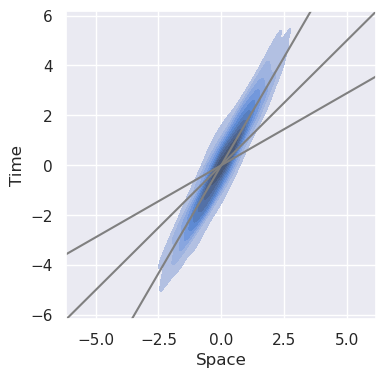

In [6]:
mean = [0, 0]
cov_mat = [[1.1, 2], [2, 4]]


plot(cov_mat, mean)
print(f'Angle of PC1: {angle_pc1(cov_mat):.5f} degrees')
print(f'Angle of regression line: {angle_regression(cov_mat):.5f} degrees')
print(f'Variance PC1 and PC2: {variance_pc(cov_mat)[0]:.3f}, {variance_pc(cov_mat)[1]:.3f}')


/home/kptruong/.conda/envs/kptruong/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


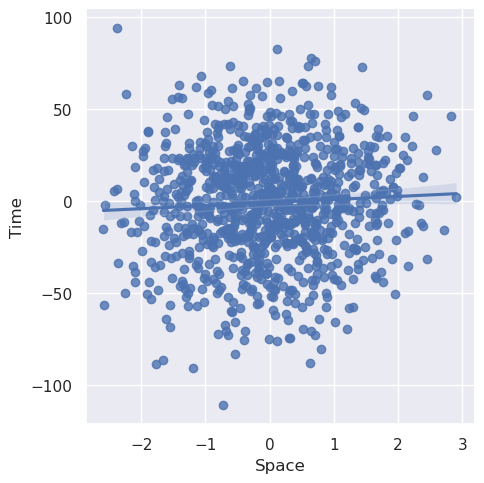

In [6]:
mean = [0, 0]
cov_mat = [[1, 1], [1, 1000]]
data = np.random.multivariate_normal(mean, cov_mat, 1000)
data = pd.DataFrame(data, columns=['Space', 'Time'])
sns.lmplot(data, x='Space', y='Time');

Regression is more accurate:
- cov_mat = [[4, 6.3], [6.3, 10]]

PC1 is more accurate:
- cov_mat = [[1, 1], [1, 10]]

In [97]:
mean = [0, 0]
cov_mat = [[250, 21], [21, 2]]


Angle of PC1: 0.5 degrees
Variance PC1 and PC2: 251.766, 0.234


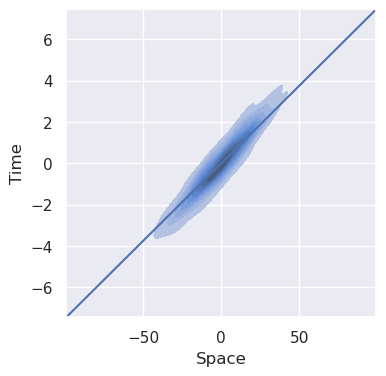

In [98]:
plot(cov_mat)
print(f'Angle of PC1: {calculate_angle(cov_mat):.1f} degrees')
print(f'Variance PC1 and PC2: {variance_pc(cov_mat)[0]:.3f}, {variance_pc(cov_mat)[1]:.3f}')

- $S_1$: Low speed limit (km/h)
- $S_2$: High speed limit (km/h)
- $V_s$: Variance of space


$S_{ms1} = \frac{S_1\times1000}{3600} = \frac{S_1}{3.6}$

$S_{ms2} = \frac{S_2\times1000}{3600} = \frac{S_2}{3.6}$

$\theta_1 = \arctan(\frac{T_1}{D}) = \arctan(\frac{1}{S_{ms1}}) = \arctan(\frac{3.6}{S_1})$ $\rightarrow$ Slope (angle with horizon)

$\theta_2 = \arctan(\frac{T_2}{D}) = \arctan(\frac{1}{S_{ms2}}) = \arctan(\frac{3.6}{S_2})$ $\rightarrow$ Slope (angle with horizon)

$\theta=0.5(\theta_1+\theta_2)$

$\tan{\theta}=\frac{CV_{s,t}}{V_s}$ $\rightarrow$ linear regression coeffcient

$\rightarrow CV_{s,t} = V_s\tan[0.5(\theta_1+\theta_2)]$

$CR_{s,t} = \frac{CV_{s,t}}{\sqrt{V_s\times V_t}}$ $\rightarrow$ correlation formula

$CR_{s,t} = \tan{\theta}\times\sqrt{\frac{V_s}{V_t}} = \frac{CV_{s,t}}{V_s}\times\sqrt{\frac{V_s}{V_t}} = \frac{CV_{s,t}}{\sqrt{V_s\times V_t}}$ $\rightarrow $ relationship between correlation and slope

$\rightarrow \frac{CV_{s,t}}{\sqrt{V_s\times V_t}} = \tan{\theta} \times \sqrt{\frac{V_s}{V_t}}$

___





$T_1 = D\div\frac{S_1\times1000}{3600} = \frac{3.6D}{S_1}$ $\rightarrow$ Time 1 to finish the bridge (seconds)

$T_2 = D\div\frac{S_2\times1000}{3600} = \frac{3.6D}{S_2}$ $\rightarrow$ Time 2 to finish the bridge (seconds)

$T = 0.5\times(T_1+T2) = 1.8D\times(\frac{1}{S_1}+\frac{1}{S_2})$ $\rightarrow$ Average time to finish the bridge (seconds)

$\theta_1 = \arctan(\frac{T_1}{D}) = \arctan(\frac{3.6}{S_1})$ $\rightarrow$ Slope (angle with horizon)

$\theta_2 = \arctan(\frac{T_2}{D}) = \arctan(\frac{3.6}{S_2})$ $\rightarrow$ Slope (angle with horizon)

$\theta=0.5(\theta_1+\theta_2) = 0.5[\arctan(\frac{3.6}{S_1})+\arctan(\frac{3.6}{S_2})] = 0.5\arctan[\frac{\frac{3.6}{S_1}+\frac{3.6}{S_1}}{1-\frac{3.6}{S_1}\times\frac{3.6}{S_1}}] = 0.5\arctan[\frac{3.6(S_1+S_2)}{S_1S_2-3.6^2}]$ $\rightarrow$ Slope (angle with horizon)


$\theta=\arctan(\frac{V_t}{V_s})$

$\rightarrow \tan(\arctan(\frac{V_t}{V_s})) = \frac{V_t}{V_s} = \tan[0.5\arctan(\frac{3.6(S_1+S_2)}{S_1S_2-3.6^2})]$

$\rightarrow V_t = V_s \times \tan(0.5\arctan[\frac{3.6(S_1+S_2)}{S_1S_2-3.6^2}])$


$\frac{T}{D} = CR_{t,s}\times\sqrt{\frac{V_t}{V_s}}$

$\rightarrow CR_{t,s} = \frac{T}{D}\div\sqrt{\frac{V_t}{V_s}} = \frac{T}{D}\times\sqrt{\frac{V_s}{V_t}}$

$\rightarrow CV_{t,s} = CR_{t,s} \times \sqrt{V_s \times V_t} = \frac{T}{D}\times\sqrt{\frac{V_s}{V_t}} \times \sqrt{V_s \times V_t}$




In [109]:
np.degrees(np.arctan(60/800))

4.289153328819018

In [110]:
def cal_cov_mat(s1: float, s2: float, std_space: float) -> np.matrix:
    var_space = std_space ** 2
    theta1 = np.arctan(3.6 / s1) 
    theta2 = np.arctan(3.6 / s2)
    theta = 0.5 * (theta1 + theta2)
    var_time = var_space * np.tan(theta)
    covariance = 2 / (s1 + s2) * np.sqrt(var_space) * np.sqrt(var_time)
    cov_mat = [[var_space, covariance], [covariance, var_time]]
    return cov_mat

In [126]:
cov_mat = cal_cov_mat(s1=80, s2=100, std_space=10)
print(cov_mat)

[[100, 0.22360453747282436], [0.22360453747282436, 4.049918123453291]]


Angle of PC1: 2.3 degrees
Variance PC1 and PC2: 100.001, 4.049


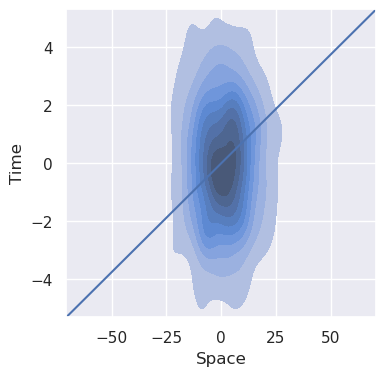

In [127]:
plot(cov_mat)
print(f'Angle of PC1: {calculate_angle(cov_mat):.1f} degrees')
print(f'Variance PC1 and PC2: {variance_pc(cov_mat)[0]:.3f}, {variance_pc(cov_mat)[1]:.3f}')

In [117]:
np.degrees(np.arctan(60/800))

4.289153328819018